In [1]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Callable

In [12]:
def g(x):
    return 3*x + 2

def rss(y_predicted, y_actual):
    return np.sum((y_actual-y_predicted)**2)

def tss(y_predicted, y_actual):
    y_ave = np.average(y_actual)
    return np.sum((y_predicted-y_ave)**2)

def r2calc(y1, ya):
    r2 = 1 - (rss(y1,ya)/tss(y1,ya))
    return r2

def pder_constant(x,b0,b1,y_actual): #vary b0
    y_predicted = predicted_linear_relation(x,b1,b0)
    a = np.sum(y_actual - y_predicted)
    b = -2/len(y_actual)
    const = a * b
    return const

def pder_grad(x,b0,b1,y_actual): #vary b1
    y_predicted = predicted_linear_relation(x,b1,b0)
    a = np.sum((y_actual - y_predicted) * x)
    b = -2/len(y_actual)
    gradient = a * b
    return gradient

def predicted_linear_relation(x,m,c): #expect x as np.array
    a = m*x + c
    return a

def mse(y_predicted, y_actual) -> float:
    n = len(y_actual)
    # print(y_predicted - y_actual)
    return (1/n)*np.sum((y_actual-y_predicted)**2)

2.5102920781916827 4.629884148993251 0.8711577635820026 10000


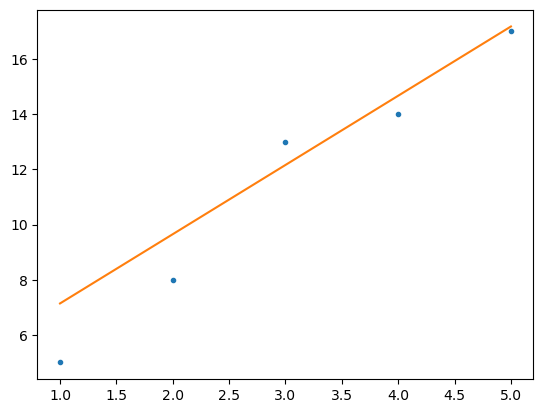

In [15]:
x = np.array([1,2,3,4,5])
y = 3*x + 2
ya = y
ya[2] = 13

runs, r2 = 0, 0
lr = 1e-5
m, c = 6, 6

plt.plot(x,ya,'.')

while runs < 10000 and r2 < 0.95:
    diff = lr * pder_grad(x,m,c,ya)
     # print("diff: " + str(diff))
    if diff < 0.00045:
         pass
    else:
        m-= diff
    diff = lr * pder_constant(x,m,c,ya)
    # print("diff: " + str(diff))
    if diff < 0.0001:
       pass
    else:
        c-=diff
    if r2 > 0.95:
        break
    yp = predicted_linear_relation(x,m,c)
    # plt.plot(x,yp)
    r2 = r2calc(yp,ya)
    runs += 1
#    print(runs, m, c, w, sep = '\t')
plt.plot(x,yp)
print(m,c,r2, runs)

plt.show()

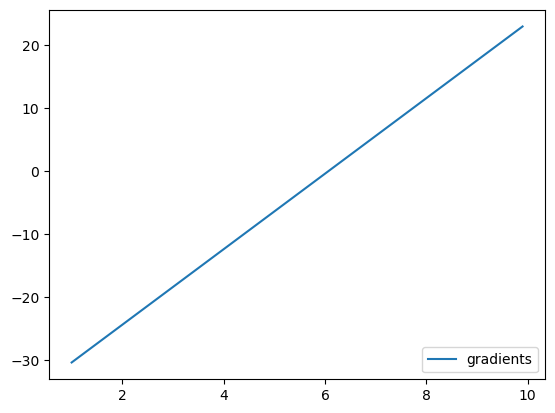

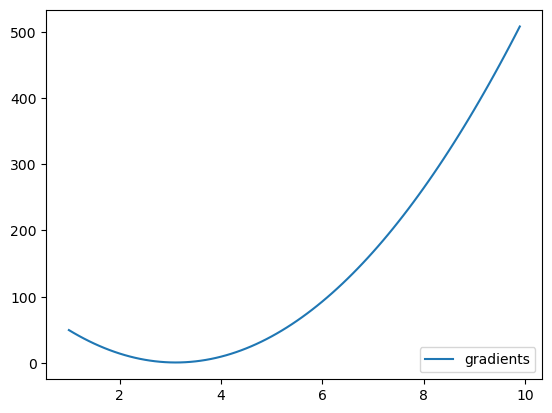

In [13]:
insert = np.arange(1,10,0.1)
gradients = []
merror = []
for a in insert:
    gradients.append(pder_grad(x, a, 2, ya))
    merror.append(mse(predicted_linear_relation(x,a,2), ya))


plt.plot(insert, gradients, label='gradients')
plt.legend(loc = 'lower right')
plt.show()

plt.plot(insert, merror, label='gradients')
plt.legend(loc = 'lower right')
plt.show()

2.5102920781916827 4.629884148993251 0.8711577635820026 1000


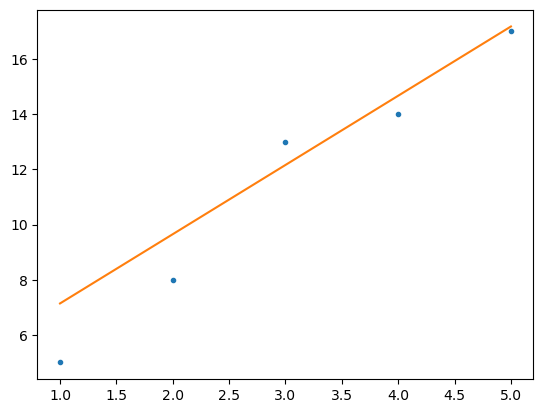

In [52]:
x = np.array([1,2,3,4,5])
y = 3*x + 2
ya = y
ya[2] = 13

runs, r2 = 0, 0
lr = 1e-5
m, c = 6, 6

plt.plot(x,ya,'.')

while runs < 1000 and r2 < 0.95:
    for _ in range(100):
        diff = lr * pder_grad(x,m,c,ya)
     # print("diff: " + str(diff))
        if diff < 0.00045:
           pass
        else:
            m-= diff
        diff = lr * pder_constant(x,m,c,ya)
        # print("diff: " + str(diff))
        if diff < 0.0001:
            pass
        else:
            c-=diff
        if r2 > 0.95:
            break
    yp = predicted_linear_relation(x,m,c)
    # plt.plot(x,yp)
    r2 = r2calc(yp,ya)
    runs += 1
print(m,c,r2, runs)
plt.plot(x,yp, label='gradient descent 1')



2.5102920781916827 4.629884148993251 0.8711577635820026 10000
2.999971970956401 2.40010119374096 0.8711577635820026


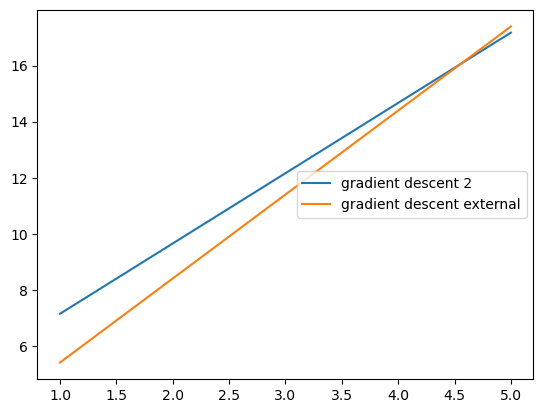

In [25]:
runs, r2 = 0, 0
lr = 1e-5
m, c = 6, 6

while runs < 10000 and r2 < 0.95:
    diff = lr * pder_grad(x,m,c,ya)
     # print("diff: " + str(diff))
    if diff < 0.00045:
         pass
    else:
        m-= diff
    diff = lr * pder_constant(x,m,c,ya)
    # print("diff: " + str(diff))
    if diff < 0.0001:
       pass
    else:
        c-=diff
    if r2 > 0.95:
        break
    yp = predicted_linear_relation(x,m,c)
    # plt.plot(x,yp)
    r2 = r2calc(yp,ya)
    runs += 1
#    print(runs, m, c, w, sep = '\t')
plt.plot(x,yp, label = 'gradient descent 2')
print(m,c,r2, runs)

m = 6
c = 6
L = 0.0001
epochs = 300000
n = float(len(x))
for i in range(epochs):
    Y_pred = m*x + c
    D_m = (-2/n) * sum(x * (ya - Y_pred))
    D_c = (-2/n) * sum(ya - Y_pred)
    m -= L * D_m
    c -= L * D_c

print(m,c, r2)
new = np.array([])
new = m*x + c
yp = predicted_linear_relation(x,m,c)
r2 = r2calc(new, ya)
plt.plot(x, new, label = 'gradient descent external')

plt.legend(loc='center right')
plt.show()

In [166]:
x = np.array([1,2,3,4,5])
y = 3*x + 2
ya = y
ya[2] = 13

2.999971970956401 2.40010119374096 0.9644437799400153


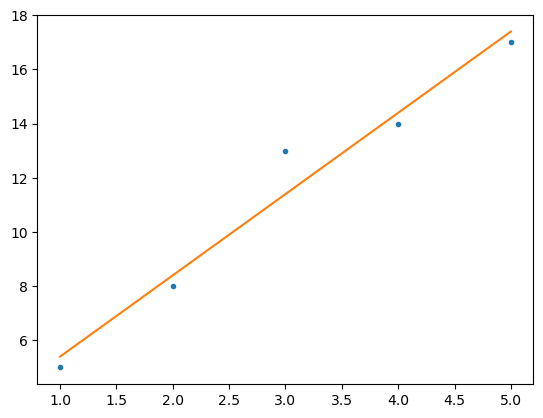

In [215]:
m = 6
c = 6
L = 0.0001
epochs = 300000
n = float(len(x))
for i in range(epochs):
    Y_pred = m*x + c
    D_m = (-2/n) * sum(x * (ya - Y_pred))
    D_c = (-2/n) * sum(ya - Y_pred)
    m -= L * D_m
    c -= L * D_c

print(m,c, r2)
new = np.array([])
new = m*x + c
yp = predicted_linear_relation(x,m,c)
r2 = r2calc(yp, ya)
plt.plot(x, ya, ".")
plt.plot(x, new)
plt.show()